In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns 
sns.set(style='ticks')

master = pd.read_csv('data/Master.csv')
teams = pd.read_csv('data/Teams.csv')
pitching = pd.read_csv('data/Pitching.csv')

master['year1'] = pd.to_datetime(master['debut']).dt.year
master['yearN'] = pd.to_datetime(master['finalGame']).dt.year
master['nameFirst'] = master['nameFirst'].replace(np.nan, '')
master['full_name'] = master[['nameFirst', 'nameLast']].apply(lambda x: ' '.join(x), axis=1)

###Home runs and strikeouts per game by decade

In [2]:
teams['decade'] = teams['yearID'] // 10 * 10
teams['home_runs_game'] = teams['HR'] / teams['G'].astype(float) * 2
teams['ks_game'] = teams['SO'] / teams['G'].astype(float) * 2
hrs_ks = teams.groupby('decade').mean()[['home_runs_game', 'ks_game']]
print(hrs_ks)

        home_runs_game    ks_game
decade                           
1870          0.172545   2.054195
1880          0.404728   7.437568
1890          0.506198   5.315472
1900          0.276874   6.396343
1910          0.339268   7.219056
1920          0.803459   5.629818
1930          1.091500   6.633209
1940          1.046166   7.099796
1950          1.685988   8.798648
1960          1.640406  11.424853
1970          1.491189  10.289952
1980          1.608066  10.684779
1990          1.920624  12.301580
2000          2.146715  13.122187
2010          1.888526  14.763147


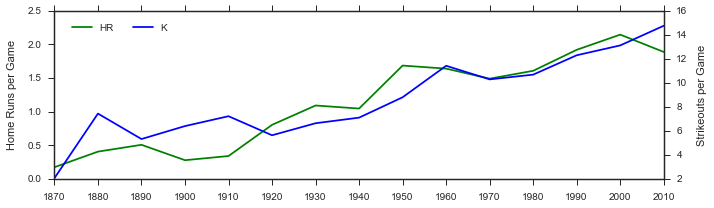

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 3))
hr, = ax1.plot(hrs_ks.index.values, hrs_ks['home_runs_game'].values, 'g')
ax1.set_xlabel('')
ax1.set_ylabel('Home Runs per Game', labelpad=11)
ax1.set_xticks(hrs_ks.index.values)
ax2 = ax1.twinx()
k, = ax2.plot(hrs_ks.index.values, hrs_ks['ks_game'].values, 'b')
ax2.set_ylabel('Strikeouts per Game', labelpad=11)
plt.legend([hr, k], ['HR', 'K'], bbox_to_anchor=[0.2, 0.98], ncol=2)
plt.tight_layout(); 

###Runs per game per league, pre-post designated hitter (1973)

In [4]:
leagues = ['NL', 'AL']
teams['runs_game'] = teams['R'] / teams['G'].astype(float) * 2
runs_league = teams.query('(yearID > 1900) & (lgID in @leagues)').groupby(['lgID', 'yearID']).mean()['runs_game']
runs_league = runs_league.unstack(level=0)
print(runs_league.head(10))

lgID           AL        NL
yearID                     
1901    10.704762  9.263174
1902     9.778514  7.954785
1903     8.199237  9.545631
1904     7.088933  7.816259
1905     7.374982  8.212055
1906     7.328892  7.131020
1907     7.317975  6.793399
1908     6.889246  6.645582
1909     6.881949  7.311494
1910     7.288026  8.068028


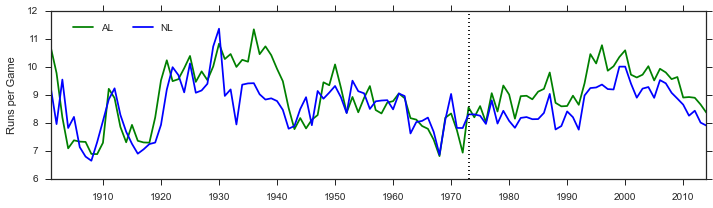

In [5]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(runs_league.index.values, runs_league['AL'].values, 'g', label='AL')
ax.plot(runs_league.index.values, runs_league['NL'].values, 'b', label='NL')
ax.axvline(x=1973, color='k', linestyle=':')
ax.set_xlabel('')
ax.set_ylabel('Runs per Game', labelpad=11)
ax.set_xlim([1901, 2014])
ax.set_xticks(np.arange(1910, 2020, step=10))
plt.legend(bbox_to_anchor=[0.2, 0.98], ncol=2)
plt.tight_layout(); 

###Proportion of complete games pitched by year

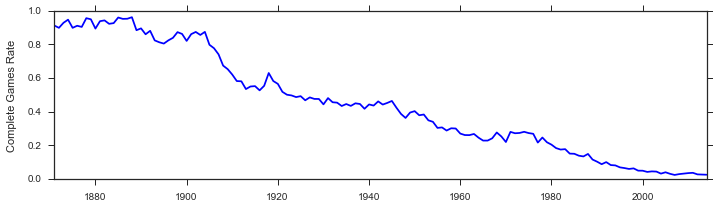

In [6]:
teams['complete_games_rate'] = teams['CG'] / teams['G'].astype(float)
complete_games = teams.groupby('yearID').mean()['complete_games_rate']

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(complete_games.index.values, complete_games.values, 'b')
ax.set_ylabel('Complete Games Rate', labelpad=11)
ax.set_xlim([1871, 2014])
plt.tight_layout(); 

###Top 25 average yearly ERA among starting pitchers with more than 200 starts since 1945

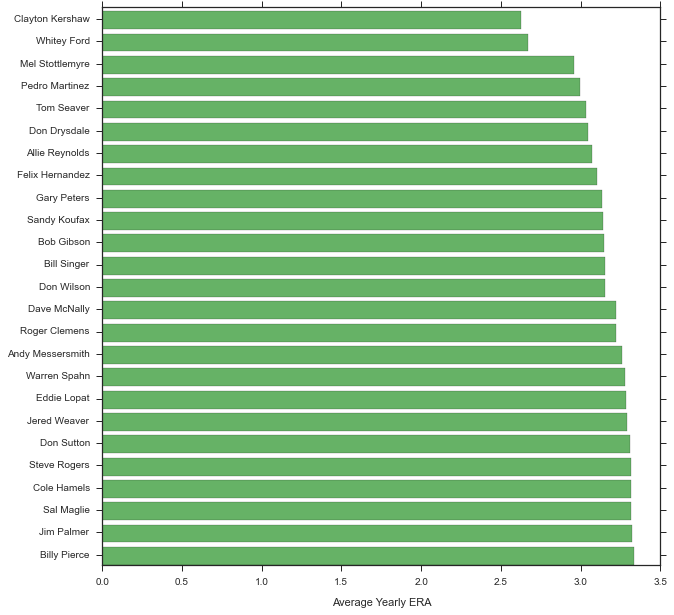

In [7]:
starters = pitching.query('yearID > 1945').groupby('playerID').sum()['GS']
starters = starters[starters > 200].index.values
starters = pitching[pitching['playerID'].isin(starters)][['playerID', 'yearID', 'ERA']].reset_index(drop=True)
starter_era = starters.groupby('playerID').mean()['ERA']
starter_era = starter_era.sort_values().reset_index()
player_cols = ['playerID', 'full_name', 'year1', 'yearN']
best_eras = pd.merge(starter_era, master[player_cols], how='left').head(25)

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(np.arange(25), best_eras['ERA'].sort_values(ascending=False), color='g', alpha=0.6)
ax.set_yticks(np.arange(25) + 0.45)
names = best_eras['full_name'].tolist() 
ax.set_yticklabels(list(reversed(names)))
ax.set_xlabel('Average Yearly ERA', labelpad=11); 